> Họ Tên: Nguyễn Đức Chí Danh <BR>
> MSSV: N20DCCN009

### Utility


In [94]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import cmath

In [95]:
u0 = v0 = 2.0
u1 = v1 = 1.5

In [96]:
nx, ny = (8,8)
cols = np.linspace(0, 7, nx)
rows = np.linspace(0, 7, ny)
ROWS, COLS = np.meshgrid(rows, cols)



In [97]:
def print_format(I, name):
    print(f'{name} :')
    print(I)
    print('='*35)

def center_dft(I):
    return np.fft.fftshift(I)

def show_I(real, imag, name_I):
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    ax[0].imshow(real, cmap='gray')
    ax[0].set_title(f'Real Of {name_I}')

    ax[1].imshow(imag, cmap='gray')
    ax[1].set_title(f'Imag Of {name_I}')
    plt.show()

def stretch(x):
    xMax = np.max(x)
    xMin = np.min(x)
    if(xMax - xMin == 0):
        return np.zeros(x.shape)
    Scale_factor = 255.0 / (xMax - xMin)
    return np.round((x - xMin) * Scale_factor)

### Ex1: <br>
Let I1 be defined by<br>

> $I_1(m, n) = \frac{1}{2} \exp^{\frac{2\pi\\j}{8}\ \left(\\u_o{m} + v_0{n}\right)}$ <br>


where m = COLUMN and n = ROW. The horizontal frequency is u0 = 2 cycles per
image (cpi) and the vertical frequency is v0 = 2 cpi. Show the real and imaginary parts
of I1 as gray scale images with 8 bits per pixel (bpp) and full-scale contrast. Compute
the DFT I1 and center it so that the frequency origin is in the middle (this is done
automatically by the C function fft2d available in the file DoFFT.c on the course web
site under the “Code” link). Print out the real and imaginary parts of I1 as 8 × 8 ascii
floating point arrays. Whether you use Python, C, or some other language, be sure
to format the output so that it is easy to read (the columns should line up and the


In [98]:
defineder = (2j * np.pi) / 8
def formular_I1(): #DFT
    I1 = 0.5 * np.exp(1j * 2 * np.pi / 8 * (u0 * COLS + v0 * ROWS))
    return I1
I1 = formular_I1()
I1_real = stretch(I1.real)
I1_imag = stretch(I1.imag)

I1 Real :
[[255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 127.]
 [127. 255. 128.   0. 127. 255. 127.   0.]]
I1 Imag :
[[128. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]]


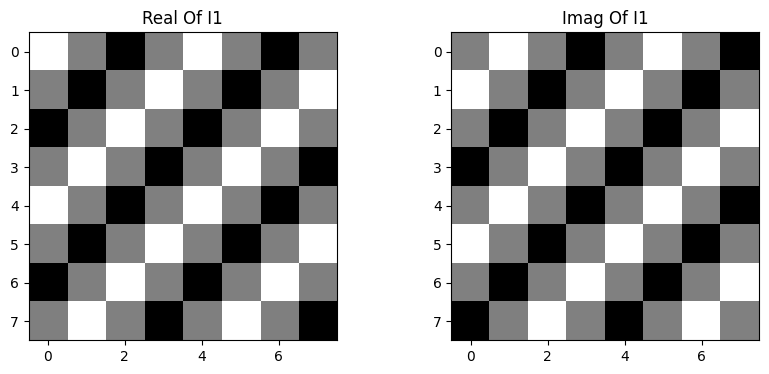

In [99]:
print_format(I1_real, name="I1 Real")
print_format(I1_imag, name="I1 Imag")
show_I(I1_real, I1_imag, "I1")


### Ex2
Let I2 be defined by

> $I_2(m, n) = \frac{1}{2} \exp^{\frac{-2\pi\\j}{8}\ \left(\\u_0{m} + v_0{n}\right)}$ <br>

where u0 = v0 = 2 cpi as in Problem 1. Show the real and imaginary parts of I2 as
8 bpp gray scale images with full-scale contrast. Compute the centered DFT I2 and
print out the real and imaginary parts of I2 as 8 × 8 ascii floating point arrays.

In [100]:
def formular_I2():
    I2 = 0.5 * np.exp(-1j * 2 * np.pi / 8 * (u0 * COLS + v0 * ROWS))
    return I2
I2 = formular_I2()
I2_real = stretch(I2.real)
I2_imag = stretch(I2.imag)

I2 Real :
[[255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 127.]
 [127. 255. 128.   0. 127. 255. 127.   0.]]
I2 Imag :
[[128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]]


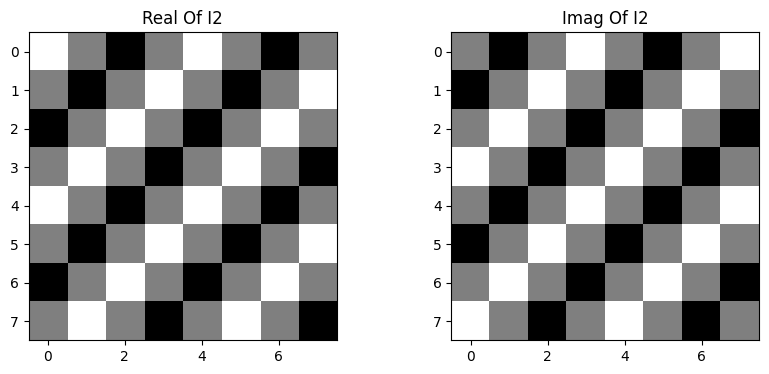

In [101]:
print_format(I2_real, "I2 Real")
print_format(I2_imag, "I2 Imag")
show_I(I2_real, I2_imag, "I2")

### Ex3
Let I3 be defined by

> $I_3(m, n) = \cos{\frac{2\pi}{8}\ \left(\\u_0{m} + v_0{n}\right)}$ <br>

where u0 = v0 = 2 cpi as in Problem 1. Note: I3 = I1 + I2. Show I3 as as an 8 bpp
gray scale image with full-scale contrast (it should look the same as the real part of I1).
Print out the real and imaginary parts of the centered DFT I3 as 8 × 8 ascii floating
point arrays.

In [102]:
def formular_I3():
    I3 = np.cos((2 * np.pi / 8) * (u0 * COLS + v0 * ROWS ))
    return I3
I3 = formular_I3()
I3_real = stretch(I3.real)
I3_imag = stretch(I3.imag)


I3 Real :
[[255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 127.]
 [127. 255. 128.   0. 127. 255. 127.   0.]]
I3 Imag :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


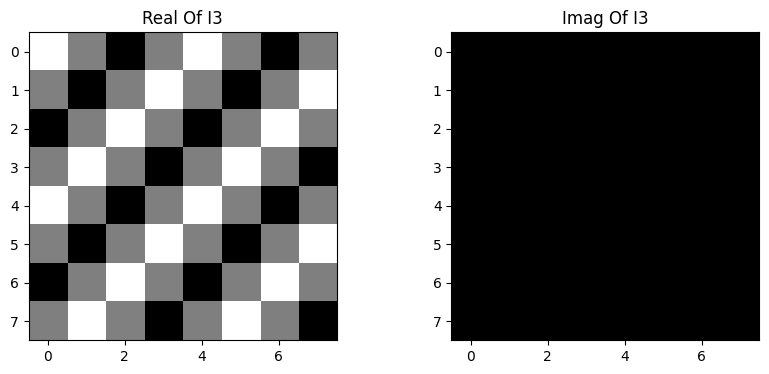

In [103]:
print_format(I3_real, "I3 Real")
print_format(I3_imag, "I3 Imag")
show_I(I3_real, I3_imag, "I3")

### Ex4

Let I4 be defined by

> $I_4(m, n) = \sin{\frac{2\pi}{8}\ \left(\\u_0{m} + v_0{n}\right)}$ <br>

where u0 = v0 = 2 cpi as in Problem 1. Note: I4 = −j(I1 − I2). Show I4 as as an 8
bpp gray scale image with full-scale contrast (it should look the same as the imaginary
part of I1). Print out the real and imaginary parts of the centered DFT I4 as 8 × 8
ascii floating point arrays.

In [104]:
def formular_I4():
    I4 = np.sin((2 * np.pi / 8) * (u0 * COLS + v0 * ROWS ))
    return I4
I4 = formular_I4()
I4_real = stretch(I4.real)
I4_imag = stretch(I4.imag)


I4 Real :
[[128. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]
 [127. 255. 128.   0. 127. 255. 128.   0.]
 [255. 128.   0. 127. 255. 128.   0. 127.]
 [128.   0. 127. 255. 128.   0. 127. 255.]
 [  0. 127. 255. 128.   0. 127. 255. 128.]]
I4 Imag :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


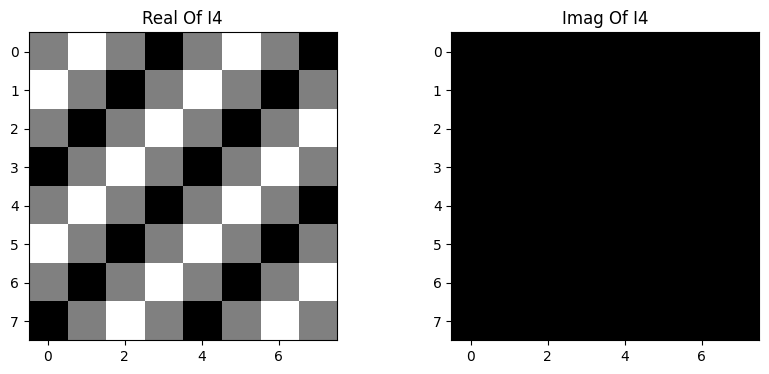

In [105]:
print_format(I4_real, "I4 Real")
print_format(I4_imag, "I4 Imag")
show_I(I4_real, I4_imag, "I4")

### Ex 5
Let I5 be defined by

> $I_5(m, n) = \cos{\frac{2\pi}{8}\ \left(\\u_1{m} + v_1{n}\right)}$ <br>

where u1 = 1.5 cpi is the horizontal frequency and v1 = 1.5 cpi is the vertical frequency.
Show I5 as an 8 bpp gray scale image with full-scale contrast and print out the real
and imaginary parts of I5 as 8 × 8 ascii floating point arrays. Discuss the appearance
of I5 as compared to I1 through I4.

In [106]:
def formular_I5():
    I5 =  np.cos((2*np.pi / 8) * (u1 * COLS + v1 * ROWS))
    return I5

I5 = formular_I5()
I5_real = stretch(I5.real)
I5_imag = stretch(I5.imag)


I5 Real :
[[255. 176.  37.  10. 127. 245. 218.  79.]
 [176.  37.  10. 127. 245. 218.  79.   0.]
 [ 37.  10. 127. 245. 218.  79.   0.  79.]
 [ 10. 127. 245. 218.  79.   0.  79. 218.]
 [127. 245. 218.  79.   0.  79. 218. 245.]
 [245. 218.  79.   0.  79. 218. 245. 128.]
 [218.  79.   0.  79. 218. 245. 128.  10.]
 [ 79.   0.  79. 218. 245. 128.  10.  37.]]
I5 Imag :
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


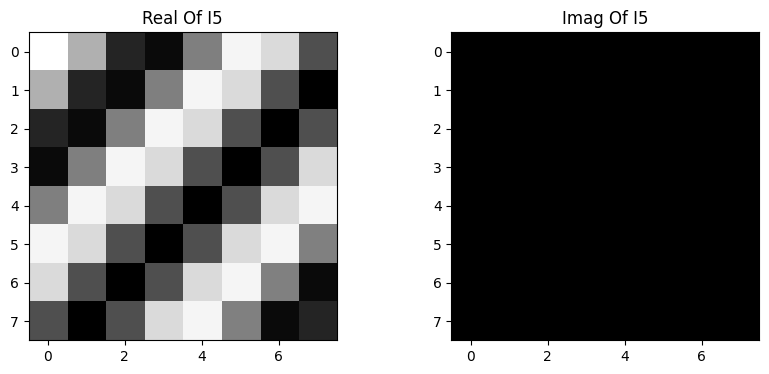

In [107]:
print_format(I5_real, "I5 Real")
print_format(I5_imag, "I5 Imag")
show_I(I5_real, I5_imag, "I5")

### Utility

In [108]:
def calculate_magnitude(center_dft):
    magnitude = np.abs(center_dft)
    return magnitude

def calculate_log_magnitude_spectrum(center_dft):
    magnitude = calculate_magnitude(center_dft)
    log_magnitude = np.log1p(magnitude)
    normalize_mag = ((log_magnitude - np.min(log_magnitude)) / (np.max(log_magnitude) - np.min(log_magnitude)))
    return normalize_mag

def calculate_phase_dft(center_dft):
    phase = np.angle(center_dft)
    normalized_phase = ((phase + np.pi) / (2 * np.pi) * 255).astype(np.uint8)
    return normalized_phase

### Ex6
Obtain the images camera.bin, salesman.bin, head.bin, and eyeR.bin from the
course web site. These are 256×256 grayscale images with 8 bpp and pixel values in the
range 0 to 255. For each one, show the original image, the real part of the centered DFT,
the imaginary part of the centered DFT, the centered DFT log-magnitude spectrum,
and the phase of the centered DFT as 8 bpp images with full-scale contrast.

In [109]:
camera_img = np.fromfile('dataset/camera.bin', dtype=np.uint8).reshape(256,256)
eyeR_img = np.fromfile('dataset/eyeR.bin', dtype=np.uint8).reshape(256,256)
head_img = np.fromfile('dataset/head.bin', dtype=np.uint8).reshape(256,256)
salesman_img = np.fromfile('dataset/salesman.bin', dtype=np.uint8).reshape(256,256)

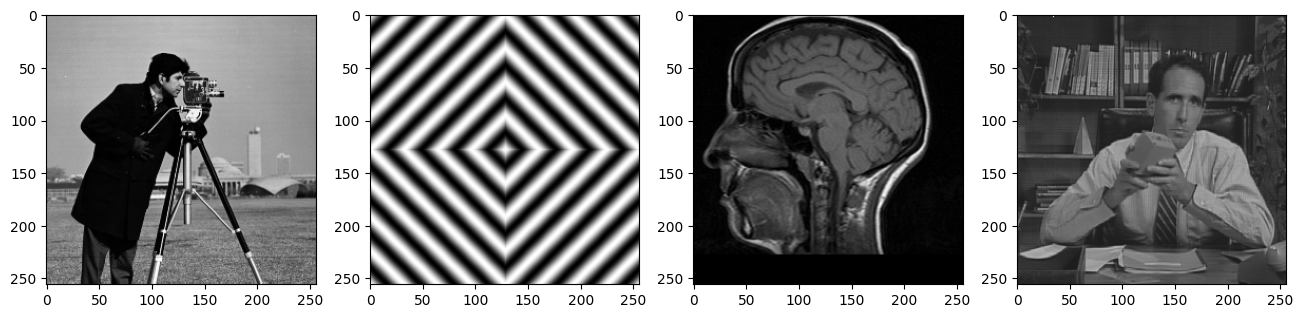

In [110]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
ax[0].imshow(camera_img, cmap='gray')
ax[1].imshow(eyeR_img, cmap='gray')
ax[2].imshow(head_img, cmap='gray')
ax[3].imshow(salesman_img, cmap='gray')

In [111]:
def Ex6_ShowImage(image):
    center_image = np.fft.fftshift(np.fft.fft2(image))
    fig, ax = plt.subplots(1, 5, figsize=(20,4))
    ax[0].set_title("Original")
    ax[0].imshow(image, cmap='gray')
    
    ax[1].imshow(center_image.imag, cmap='gray')
    ax[1].set_title('Real part centered DFT')

    ax[2].imshow(center_image.real, cmap='gray')
    ax[2].set_title('Imaginary part centerd DFT')

    ax[3].imshow(calculate_log_magnitude_spectrum(center_image), cmap='gray')
    ax[3].set_title('the centered DFT Log-magnitude spectrum')

    ax[4].set_title('Phase of the centered DFT')
    ax[4].imshow(calculate_phase_dft(center_image), cmap='gray')

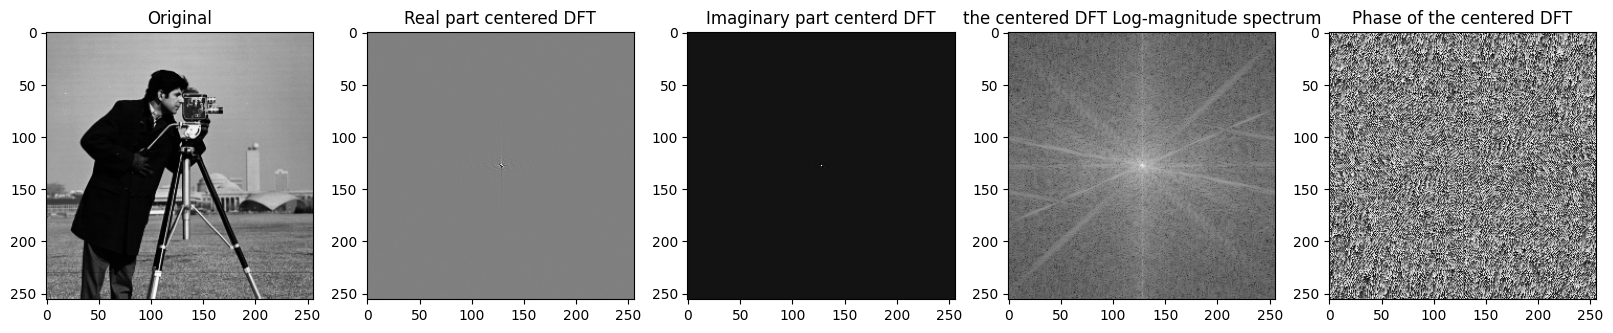

In [112]:
Ex6_ShowImage(camera_img)

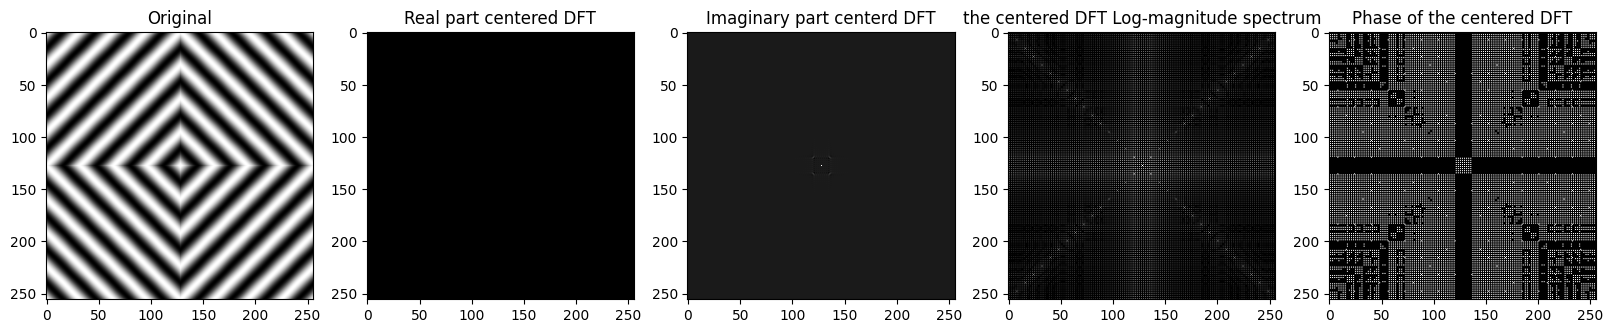

In [113]:
Ex6_ShowImage(eyeR_img)

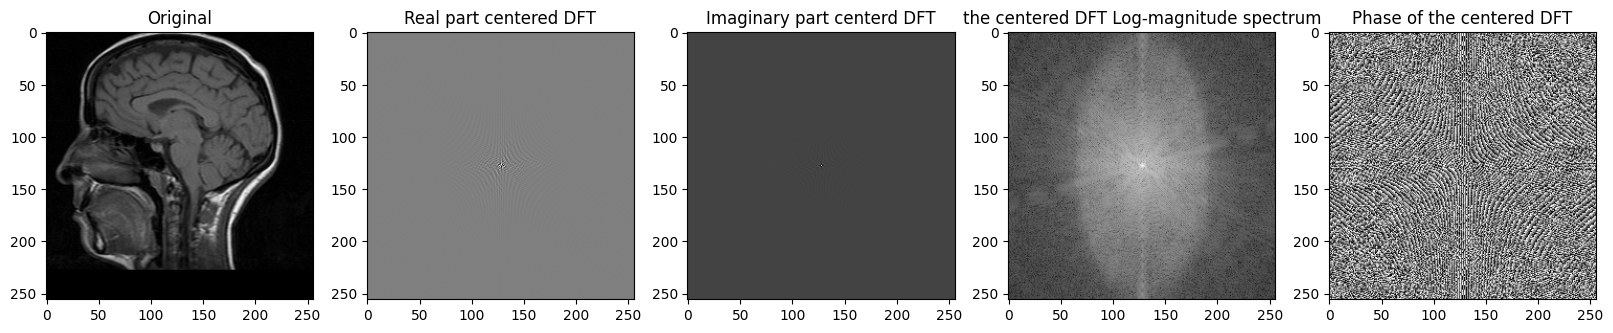

In [114]:
Ex6_ShowImage(head_img)

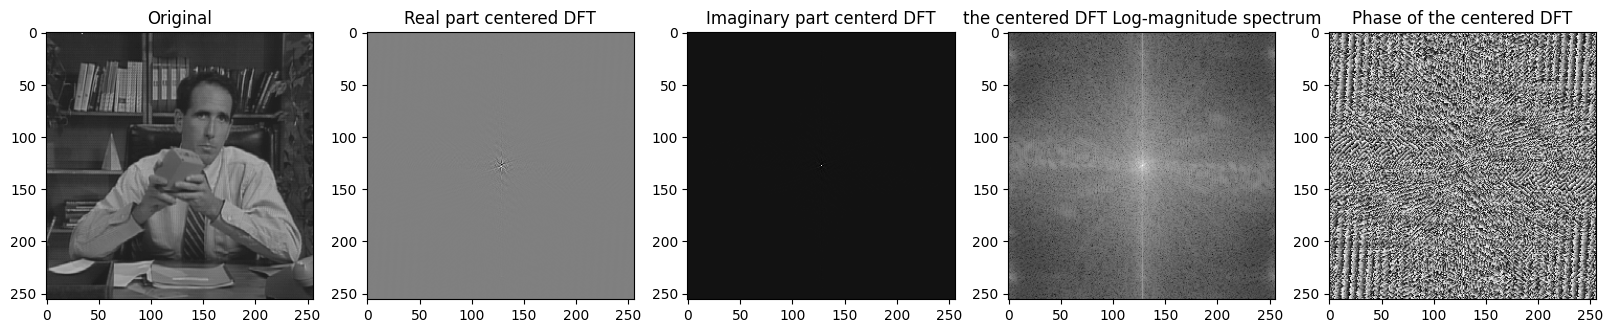

In [115]:
Ex6_ShowImage(salesman_img)

### Ex7.
Let I6 be the Cameraman image from the file camera.bin. Define a new image J1
according to |J1| = |I6| and arg J1 = 0. Define another new image J2 according to
|J2| = 1 and arg J2 = arg I6. To within floating point roundoff, J1 and J2 will both
be real (discard any nonzero imaginary part). J1 illustrates the contribution of the
DFT magnitude to the original image, while J2 illustrates the contribution of the DFT
phase to the original image.
Show J2 as an 8 bpp grayscale image with full-scale contrast.
J1 is a little bit trickier to display because there are a few pixels that are much brighter
than the rest. But the pixels of J1 are all real-valued and greater than zero. So let
JJ
1 = log(J1) and display JJ
1 as an 8 bpp grayscale image with full-scale contrast.

In [116]:
I6 = np.fft.fft2(camera_img)
J1titlde = np.abs(I6)
J1 = np.fft.ifft2(J1titlde).real

J1prime = stretch(np.log(1 + J1))


J2tilde = np.exp(1j * np.angle(I6))
J2 = stretch(np.fft.ifft2(J2tilde).real)


Text(0.5, 1.0, 'J2')

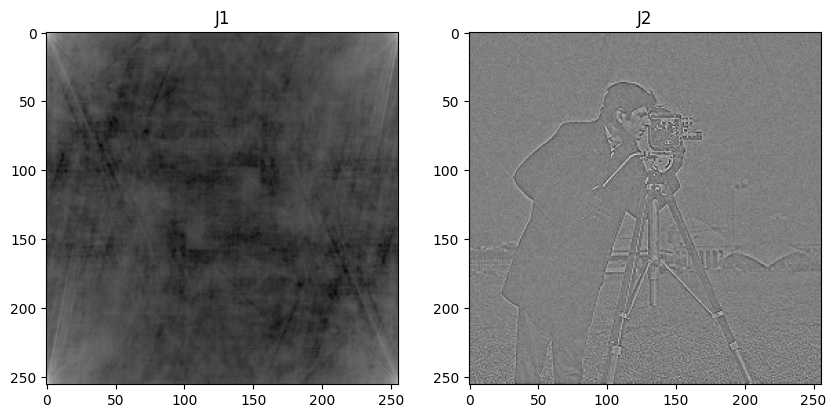

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(J1prime, cmap='gray')
ax[0].set_title("J1")

ax[1].imshow(J2, cmap='gray')
ax[1].set_title("J2")